filtered values:         Variable1   Variable2  Correlation_pre  Correlation_post hemisphere
1      CL_area_32  CL_area_25           0.2203            0.1510       left
54     CL_area_32  CR_area_32           0.6318            0.5649    unknown
55     CL_area_32  CR_area_25           0.2052            0.1055    unknown
108    CL_area_25  CL_area_32           0.2203            0.1510       left
113    CL_area_25  CL_area_14           0.4674            0.3554       left
...           ...         ...              ...               ...        ...
11555       CR_V2       CR_V1           0.4864            0.4177      right
11608       CR_V1       CL_V2           0.3302            0.1412    unknown
11609       CR_V1       CL_V1           0.3214            0.1193    unknown
11661       CR_V1       CR_V3           0.2099            0.1390      right
11662       CR_V1       CR_V2           0.4864            0.4177      right

[1104 rows x 5 columns]


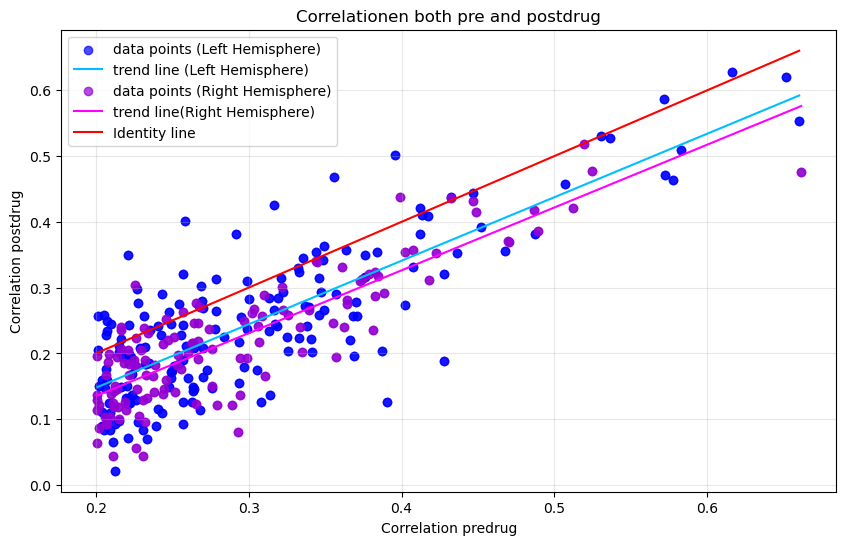

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

pre_df = pd.read_csv('correlation_files/csv_tables/Tabea_correlation_matrix_long_format_predrug_003.csv')
post_df = pd.read_csv('correlation_files/csv_tables/Tabea_correlation_matrix_long_format_postdrug_003.csv')

pre_df = pre_df[['Variable1', 'Variable2', 'Correlation']]
post_df = post_df[['Variable1', 'Variable2', 'Correlation']]

# Merge the data frames
merged_df = pd.merge(pre_df, post_df, on=['Variable1', 'Variable2'], suffixes=('_pre', '_post'))

# add hemisphere classification
def hemisphere_assignment(row):
    var1, var2 = row['Variable1'], row['Variable2']
    
    if var1.startswith('CL') and var2.startswith('CL'):
        return 'left'
    elif var1.startswith('CR') and var2.startswith('CR'):
        return 'right'
    else:
        return 'unknown'

merged_df['hemisphere'] = merged_df.apply(hemisphere_assignment, axis=1)

# Filter the data
filtered_df = merged_df[(merged_df['Correlation_pre'] != 1) & (merged_df['Correlation_pre'] >0.2)  & (merged_df['Correlation_post'] != 1)]
print(f"filtered values: {filtered_df}")

plt.figure(figsize=(10, 6))

# data left hemisphere
left_df = filtered_df[filtered_df['hemisphere'] == 'left']
plt.scatter(left_df['Correlation_pre'], left_df['Correlation_post'], alpha=0.7, label='data points (Left Hemisphere)', color='blue')

# trend line left hemisphere
coeffs_left = np.polyfit(left_df['Correlation_pre'], left_df['Correlation_post'], 1)
trendline_left = np.poly1d(coeffs_left)
x_vals_left = np.linspace(left_df['Correlation_pre'].min(), left_df['Correlation_pre'].max(), 100)
plt.plot(x_vals_left, trendline_left(x_vals_left), color='deepskyblue', linestyle='-', label='trend line (Left Hemisphere)')

# data for right hemisphere
right_df = filtered_df[filtered_df['hemisphere'] == 'right']
plt.scatter(right_df['Correlation_pre'], right_df['Correlation_post'], alpha=0.7, label='data points (Right Hemisphere)', color='darkviolet')

# trend line right hemisphere
coeffs_right = np.polyfit(right_df['Correlation_pre'], right_df['Correlation_post'], 1)
trendline_right = np.poly1d(coeffs_right)
x_vals_right = np.linspace(right_df['Correlation_pre'].min(), right_df['Correlation_pre'].max(), 100)
plt.plot(x_vals_right, trendline_right(x_vals_right), color='magenta', linestyle='-', label='trend line(Right Hemisphere)')

#  identity line
plt.plot(x_vals_left, x_vals_left, color='red', linestyle='-', label='Identity line')

# Plot-Details
plt.xlabel('Correlation predrug')
plt.ylabel('Correlation postdrug')
plt.title('Correlationen both pre and postdrug')
plt.legend()
plt.grid(alpha=0.3)
plt.savefig("diagram.png")  
plt.show()